<a href="https://colab.research.google.com/github/arpit-parejiya01/Data_Preprocessing/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/customer_(copy).csv')

In [ ]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5000,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes


# **Data Cleaning**

In [ ]:
df.shape

(300, 21)

In [ ]:
df.size

6300

In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        300 non-null    object 
 1   gender            300 non-null    object 
 2   SeniorCitizen     300 non-null    int64  
 3   Partner           300 non-null    object 
 4   Dependents        300 non-null    object 
 5   tenure            300 non-null    int64  
 6   PhoneService      300 non-null    object 
 7   MultipleLines     300 non-null    object 
 8   InternetService   300 non-null    object 
 9   OnlineSecurity    300 non-null    object 
 10  OnlineBackup      300 non-null    object 
 11  DeviceProtection  300 non-null    object 
 12  TechSupport       300 non-null    object 
 13  StreamingTV       300 non-null    object 
 14  StreamingMovies   300 non-null    object 
 15  Contract          300 non-null    object 
 16  PaperlessBilling  300 non-null    object 
 1

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,300.000000,300.000000,300.000000,300.000000
mean,0.543333,116.843333,67.226800,2477.975767
std,0.498951,570.718692,28.638073,1918.540111
min,0.000000,1.000000,18.450000,30.030000
25%,0.000000,18.000000,42.337500,910.302500
50%,1.000000,36.500000,68.635000,2072.400000
75%,1.000000,56.000000,92.430000,3618.405000
max,1.000000,5400.000000,118.640000,8318.880000


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df.nunique()

,0
customerID,300
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,80
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().mean()*100

,0
customerID,0.0
gender,0.0
SeniorCitizen,0.0
Partner,0.0
Dependents,0.0
tenure,0.0
PhoneService,0.0
MultipleLines,0.0
InternetService,0.0
OnlineSecurity,0.0


In [ ]:
categorical_features = [
   "gender",
   "Partner",
   "Dependents",
   "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
    "PaymentMethod"
]
numerical_features = [
    "tenure",
    "MonthlyCharges",
    "TotalCharges"
]
target = "Churn"

In [ ]:
df.skew(numeric_only=True)

,0
SeniorCitizen,-0.174864
tenure,7.981430
MonthlyCharges,-0.007704
TotalCharges,0.773003


In [ ]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,-0.047173,0.090572,0.016964
tenure,-0.047173,1.000000,-0.074552,0.007471
MonthlyCharges,0.090572,-0.074552,1.000000,0.602747
TotalCharges,0.016964,0.007471,0.602747,1.000000


# **Feature Distribution**

In [ ]:
df[numerical_features].describe()

,tenure,MonthlyCharges,TotalCharges
count,300.000000,300.000000,300.000000
mean,116.843333,67.226800,2477.975767
std,570.718692,28.638073,1918.540111
min,1.000000,18.450000,30.030000
25%,18.000000,42.337500,910.302500
50%,36.500000,68.635000,2072.400000
75%,56.000000,92.430000,3618.405000
max,5400.000000,118.640000,8318.880000


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

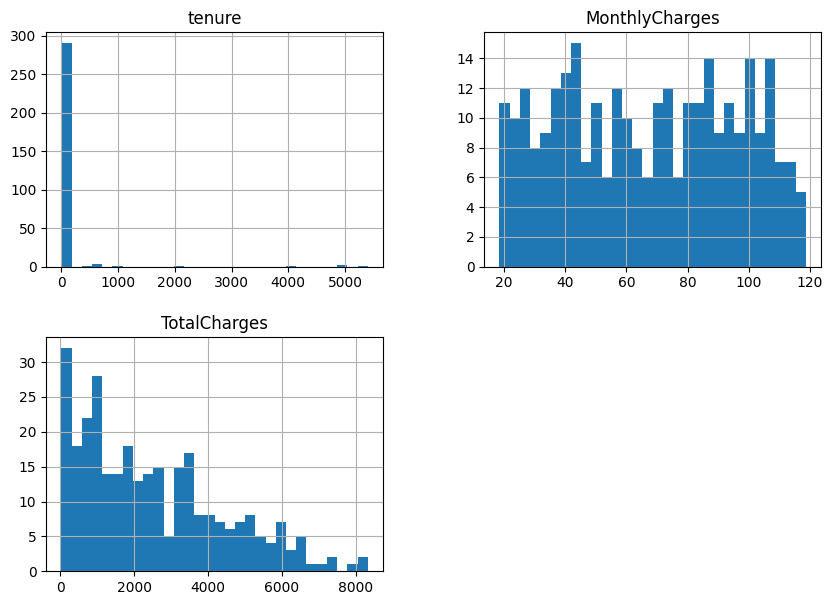

In [ ]:
df[numerical_features].hist(bins=30,figsize=(10,7))

array([<Axes: title={'center': 'tenure'}>,
       <Axes: title={'center': 'MonthlyCharges'}>,
       <Axes: title={'center': 'TotalCharges'}>], dtype=object)

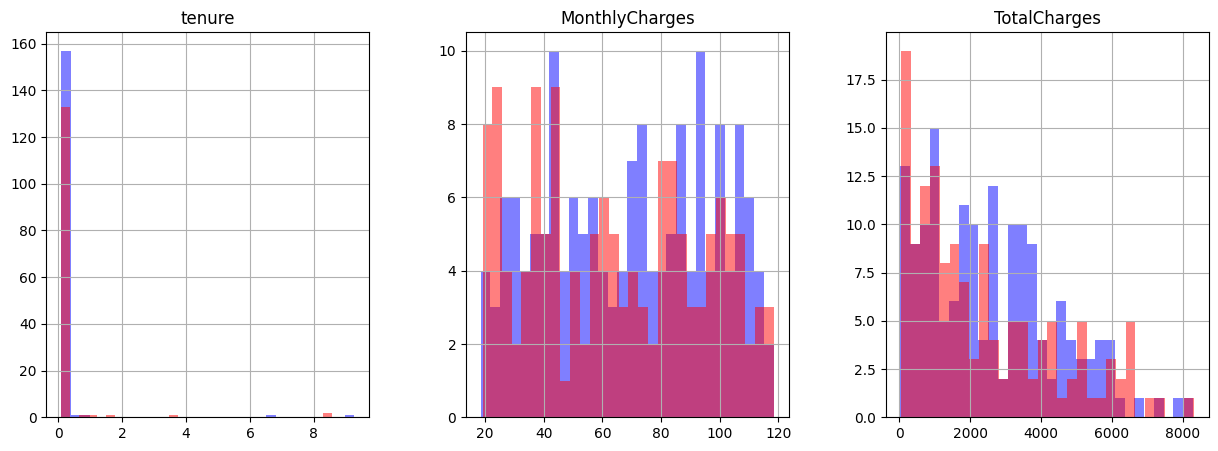

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
df[df.Churn == 'No'][numerical_features].hist(bins=30,color = 'blue',alpha = 0.5,ax=ax)
df[df.Churn == 'Yes'][numerical_features].hist(bins=30,color = 'red',alpha = 0.5,ax=ax)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

ROWS, COLS = 7,3
fig, ax = plt.subplots(ROWS,COLS, figsize=(15,15))
row, col = 0, 0,
for i, categorical_features in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_features].value_counts().plot(kind='bar', ax=ax[row, col]).set_title(categorical_features)


In [ ]:
feature = 'Contract'
fig, ax = plt.subplots(1,2, figsize=(12,4))
df[df.Churn=='No'][feature].value_counts().plot(kind='bar',ax=ax[0]).set_title('not churn')
df[df.Churn=='Yes'][feature].value_counts().plot(kind='bar',ax=ax[1]).set_title('churn')

# **Correlation Matrix with features**

In [ ]:
df.drop(columns='customerID',inplace=True)

In [ ]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.026188,-0.040245,0.073083,-0.003514,-0.006939,-0.076498,-0.012487,0.064611,-0.003859,0.088686,-0.045460,-0.011367,-0.029120,0.020837,-0.047497,-0.137461,-0.071253,0.016507,0.000490
SeniorCitizen,0.026188,1.000000,-0.043075,0.055666,-0.047173,0.003215,0.062481,-0.079937,0.091678,-0.066167,-0.135752,-0.064466,0.180018,0.095585,-0.021840,-0.108973,0.006782,0.090572,0.016964,-0.060702
Partner,-0.040245,-0.043075,1.000000,0.031618,0.050262,-0.034714,0.012779,0.061643,0.001074,0.027974,-0.002162,-0.005078,0.049504,-0.170625,-0.074689,0.083969,0.048158,0.064581,0.022056,-0.077808
Dependents,0.073083,0.055666,0.031618,1.000000,-0.020918,0.011225,0.053584,0.044885,0.033963,-0.026973,0.020878,0.019067,-0.021457,-0.062649,-0.040646,-0.005007,0.129212,-0.052326,-0.094119,-0.029544
tenure,-0.003514,-0.047173,0.050262,-0.020918,1.000000,0.009490,0.135219,0.054068,-0.088023,-0.047891,0.014919,-0.119344,-0.053394,-0.015688,-0.038662,0.037697,0.031046,-0.074552,0.007471,0.030654
PhoneService,-0.006939,0.003215,-0.034714,0.011225,0.009490,1.000000,0.061354,0.102956,0.041568,-0.058641,0.054161,-0.054693,0.066785,0.053904,-0.000976,-0.003753,-0.002633,-0.105323,0.006921,-0.030506
MultipleLines,-0.076498,0.062481,0.012779,0.053584,0.135219,0.061354,1.000000,-0.014759,0.072396,0.014055,-0.003594,-0.004398,-0.062091,0.030255,0.052537,0.014043,0.001628,-0.002694,0.052562,0.002561
InternetService,-0.012487,-0.079937,0.061643,0.044885,0.054068,0.102956,-0.014759,1.000000,-0.024563,0.029454,0.119789,-0.061613,0.006746,-0.025827,0.000958,0.044519,0.042757,-0.066720,-0.042522,-0.003234
OnlineSecurity,0.064611,0.091678,0.001074,0.033963,-0.088023,0.041568,0.072396,-0.024563,1.000000,-0.043171,-0.007695,0.095332,-0.014219,-0.050045,-0.012301,-0.021236,0.104389,-0.054040,0.094722,-0.083078
OnlineBackup,-0.003859,-0.066167,0.027974,-0.026973,-0.047891,-0.058641,0.014055,0.029454,-0.043171,1.000000,-0.051872,-0.053135,-0.011255,-0.024498,0.090311,-0.002848,-0.054846,-0.026178,0.016303,0.082048


<Axes: >

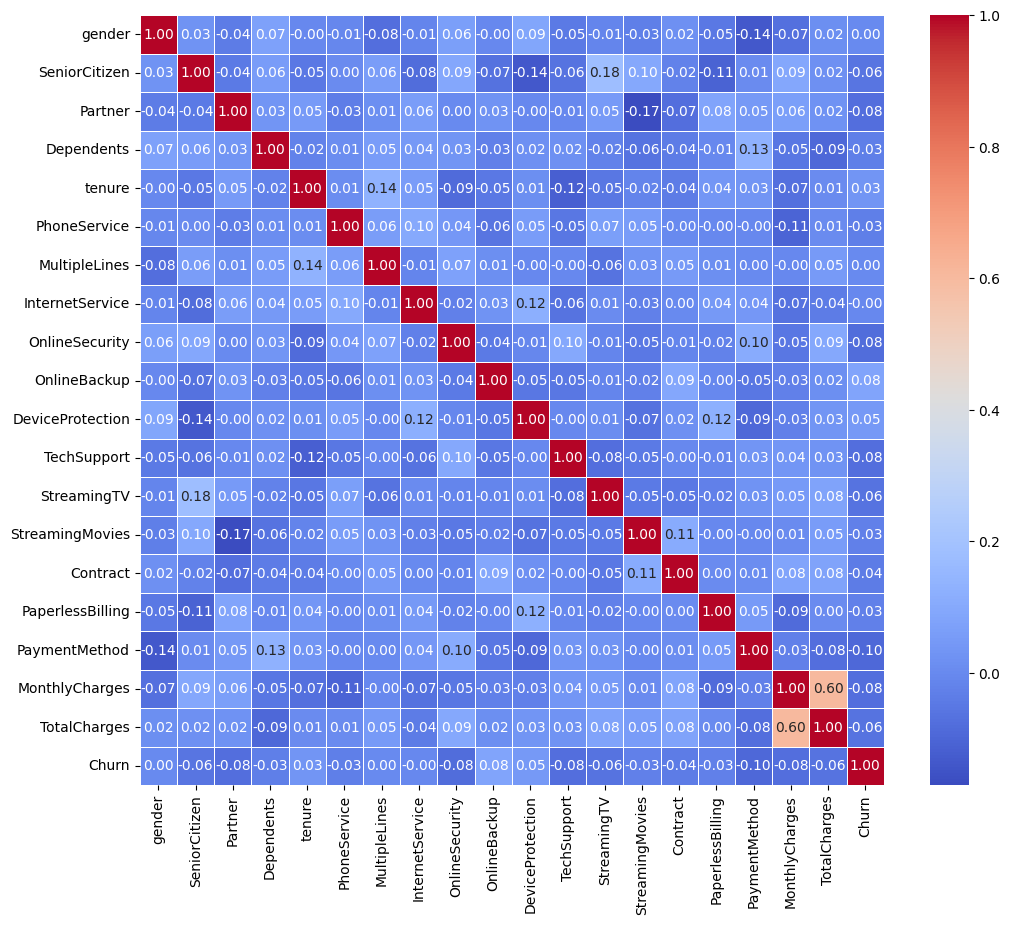

In [ ]:
# sns.heatmap(df[categorical_features].corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)

In [ ]:
import pandas as pd

# Function to compute and sort correlation percentages
def compute_and_sort_correlations(data, target):
    # Compute correlation matrix
    corr_matrix = data.corr()
    # Extract correlation with target column
    corr_target = corr_matrix[target].drop(target)
    # Convert correlation to percentage
    corr_target_percentage = (corr_target * 100).round(2)
    # Sort features by absolute correlation values in descending order
    sorted_corr_target = corr_target_percentage.abs().sort_values(ascending=False)
    sorted_corr_target = sorted_corr_target.sort_values(ascending=False)
    return sorted_corr_target

# Define target column
target_column = 'Churn'

# Compute and sort correlation percentages
sorted_correlations = compute_and_sort_correlations(df, target_column)

# Output the results
print("Correlation percentages sorted by strength with respect to", target_column)
for feature, percentage in sorted_correlations.items():
    print(f"{feature} :- {percentage}%")


Correlation percentages sorted by strength with respect to Churn
PaymentMethod :- 9.66%
OnlineSecurity :- 8.31%
OnlineBackup :- 8.2%
Partner :- 7.78%
TechSupport :- 7.63%
MonthlyCharges :- 7.59%
StreamingTV :- 6.32%
TotalCharges :- 6.26%
SeniorCitizen :- 6.07%
DeviceProtection :- 4.54%
Contract :- 4.24%
tenure :- 3.07%
PhoneService :- 3.05%
Dependents :- 2.95%
StreamingMovies :- 2.89%
PaperlessBilling :- 2.67%
InternetService :- 0.32%
MultipleLines :- 0.26%
gender :- 0.05%


In [ ]:
df[target].value_counts().plot(kind='bar').set_title('Churn')

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='Contract', hue='Contract', color="#c0749c")

In [ ]:
x = ['tenure']
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in x:
    count_outliers(df,i)

There are outliers in tenure
Count of outliers are: 10


# **Detect outlier**

**Box Plot**

<Axes: xlabel='tenure'>

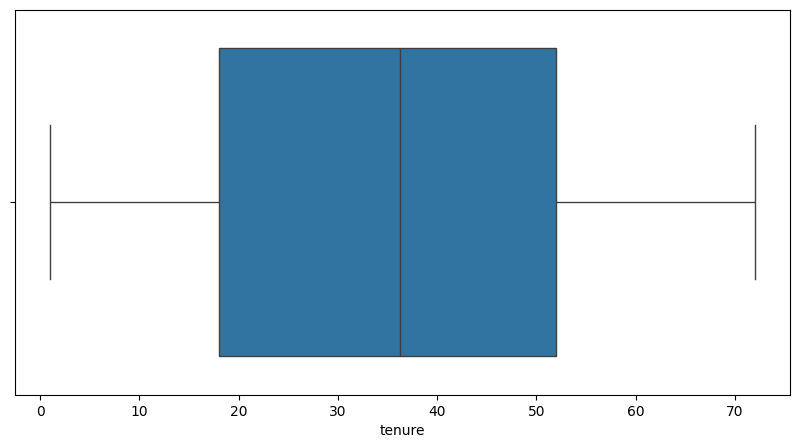

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x="tenure",data=df)

<ipython-input-39-a52becc4ecf0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["tenure"])


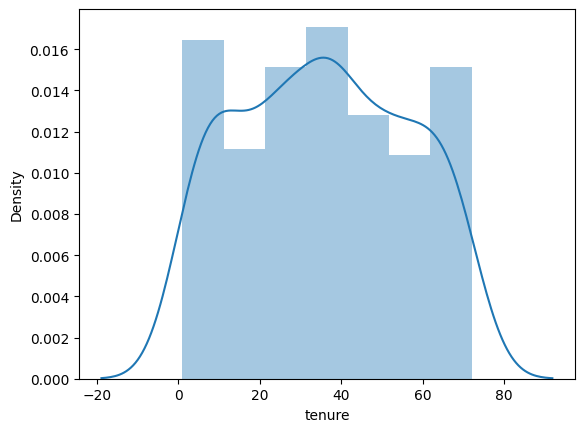

In [ ]:
sns.distplot(df["tenure"])
plt.show()

No outliers in tenure


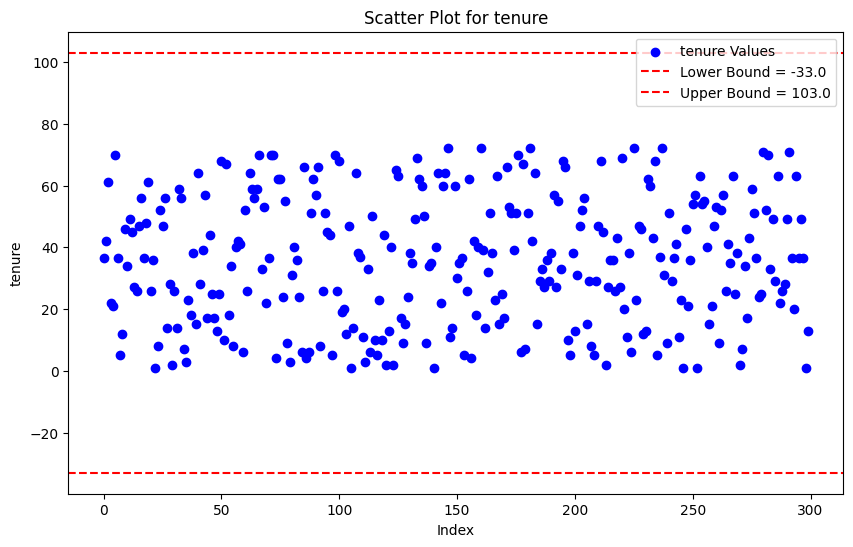

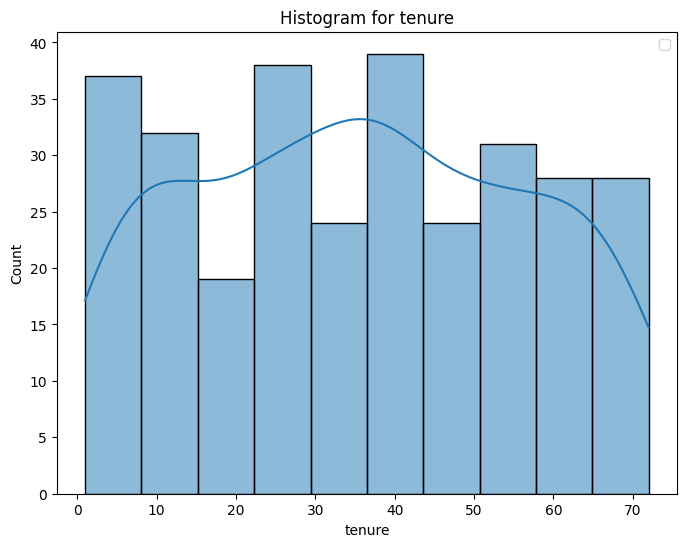

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Define the column to analyze
x = ['tenure']

# Function to detect outliers and plot graphs
def count_outliers(data, col):
    q1 = data[col].quantile(0.25, interpolation='nearest')
    q3 = data[col].quantile(0.75, interpolation='nearest')
    IQR = q3 - q1
    global LLP
    global ULP
    LLP = q1 - 1.5 * IQR
    ULP = q3 + 1.5 * IQR

    if data[col].min() > LLP and data[col].max() < ULP:
        print("No outliers in", col)
    else:
        print("There are outliers in", col)
        lower_outliers = data[data[col] < LLP][col].size
        upper_outliers = data[data[col] > ULP][col].size
        a.append(col)
        print(f'Count of outliers in {col}: {lower_outliers + upper_outliers}')

    # # Box plot for visualization
    # plt.figure(figsize=(10, 6))
    # sns.boxplot(x=data[col])
    # plt.axvline(LLP, color='r', linestyle='--', label=f'Lower Bound = {LLP}')
    # plt.axvline(ULP, color='r', linestyle='--', label=f'Upper Bound = {ULP}')
    # plt.title(f'Box Plot for {col}')
    # plt.legend()
    # plt.show()

    # Scatter plot for visualization
    plt.figure(figsize=(10, 6))
    plt.scatter(range(data.shape[0]), data[col], color='b', label=f'{col} Values')
    plt.axhline(LLP, color='r', linestyle='--', label=f'Lower Bound = {LLP}')
    plt.axhline(ULP, color='r', linestyle='--', label=f'Upper Bound = {ULP}')
    plt.title(f'Scatter Plot for {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()
    plt.show()

    # Histogram plot for visualization
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], bins=10, kde=True)
    # plt.axvline(LLP, color='r', linestyle='--', label=f'Lower Bound = {LLP}')
    # plt.axvline(ULP, color='r', linestyle='--', label=f'Upper Bound = {ULP}')
    plt.title(f'Histogram for {col}')
    plt.legend()
    plt.show()

# Global list to store columns with outliers
global a
a = []

# Run the function for the specified columns
for i in x:
    count_outliers(df, i)


# **Handel outlier**

**Replacing Outliers with Median**

In [ ]:
import pandas as pd
import numpy as np

# Define the column to analyze
x = ['tenure']

# Function to handle outliers by replacing with median
def handle_outliers_replace_with_median(data, col):
    q1 = data[col].quantile(0.25, interpolation='nearest')
    q3 = data[col].quantile(0.75, interpolation='nearest')
    IQR = q3 - q1
    global LLP
    global ULP
    LLP = q1 - 1.5 * IQR
    ULP = q3 + 1.5 * IQR

    median_value = data[col].median()

    # Replace outliers with the median
    data[col] = np.where((data[col] < LLP) | (data[col] > ULP), median_value, data[col])

    return data

# Apply the function to handle outliers in the 'tenure' column
for i in x:
    df = handle_outliers_replace_with_median(df, i)




**Removing Outliers**

In [ ]:
# Function to handle outliers by removing them
def handle_outliers_remove(data, col):
    q1 = data[col].quantile(0.25, interpolation='nearest')
    q3 = data[col].quantile(0.75, interpolation='nearest')
    IQR = q3 - q1
    global LLP
    global ULP
    LLP = q1 - 1.5 * IQR
    ULP = q3 + 1.5 * IQR

    # Remove outliers
    data = data[(data[col] >= LLP) & (data[col] <= ULP)]

    return data

# Apply the function to handle outliers by removing them
for i in x:
    df = handle_outliers_remove(df, i)

# Check the modified dataset
print(df)


In [ ]:
df.drop(columns='customerID',inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,5,No,Yes,No,No,Yes,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,Female,0,No,No,42,Yes,No phone service,DSL,Yes,Yes,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,Male,0,No,No,61,Yes,No phone service,No,No,Yes,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,Male,1,No,Yes,22,Yes,No,No,No internet service,No internet service,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,Male,1,Yes,Yes,21,No,No,DSL,No,No,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [ ]:
df['gender']= le.fit_transform(df['gender'])
df['Churn']= le.fit_transform(df['Churn'])
df['Partner']= le.fit_transform(df['Partner'])
df['Dependents']= le.fit_transform(df['Dependents'])
df['PhoneService']= le.fit_transform(df['PhoneService'])
df['MultipleLines']= le.fit_transform(df['MultipleLines'])
df['InternetService']= le.fit_transform(df['InternetService'])
df['OnlineSecurity']= le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']= le.fit_transform(df['OnlineBackup'])
df['DeviceProtection']= le.fit_transform(df['DeviceProtection'])
df['TechSupport']= le.fit_transform(df['TechSupport'])
df['StreamingTV']= le.fit_transform(df['StreamingTV'])
df['StreamingMovies']= le.fit_transform(df['StreamingMovies'])
df['Contract']= le.fit_transform(df['Contract'])
df['PaperlessBilling']= le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']= le.fit_transform(df['PaymentMethod'])